In [76]:
pip install matrix_factorization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#importing the MF library
from matrix_factorization import BaselineModel, KernelMF, train_update_test_split

#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

#Using the movie data from movielens. I used the dataset with minimum size for computational
cols = ["user_id", "item_id", "rating", "timestamp"]
movie_data = pd.read_csv(
    "/content/ratings.csv", names=cols, usecols=[0, 1, 2], engine="python"
)
movie_data = movie_data.iloc[1:,:]
movie_data = movie_data.astype(float)

In [78]:
from collections import Counter
movies_list = list(movie_data['item_id'])
distinct_movie_count = len(Counter(movies_list).keys()) #9724 distinct movies, 610 users

In [79]:
#Now, let us analyze the data in matrix format:
df_matrix = movie_data.pivot(index = 'user_id', columns ='item_id', values = 'rating')
df_matrix

item_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,193565.0,193567.0,193571.0,193573.0,193579.0,193581.0,193583.0,193585.0,193587.0,193609.0
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606.0,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608.0,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
np.mean(df_matrix.count(axis=1)) #avg number of movies rated by users

165.30491803278687

In [81]:
np.std(df_matrix.count(axis=1)) #std for the number of movies rated by users

269.2596080610495

In [82]:
X = movie_data[["user_id", "item_id"]]
y = movie_data["rating"]
#X = X.astype(float)
#y = y.astype(float)

# Let's split the data:
(X_train_first, y_train_first, X_train_update, y_train_update, X_test_update, y_test_update,
) = train_update_test_split(movie_data, frac_new_users=0.2)

# Start the training with a portion of the users
matrix_factorized = KernelMF(n_epochs=20, n_factors=100, verbose=1, lr=0.001, reg=0.005)
matrix_factorized.fit(X_train_first, y_train_first)

# Now, we are updating the model with new users
matrix_factorized.update_users(X_train_update, y_train_update, lr=0.001, n_epochs=20, verbose=1)
pred = matrix_factorized.predict(X_test_update)
rmse = mse(y_test_update, pred, squared=False)
print(f"\nTest RMSE: {rmse:.4f}")

# Now, we can get new recommendations using the model
user = 1
items_known = X_train_first.query("user_id == @user")["item_id"]
matrix_factorized.recommend(user=user, items_known=items_known)

Epoch  1 / 20  -  train_rmse: 0.9795315212045279
Epoch  2 / 20  -  train_rmse: 0.9530286631622791
Epoch  3 / 20  -  train_rmse: 0.9361394816084095
Epoch  4 / 20  -  train_rmse: 0.9237308624104271
Epoch  5 / 20  -  train_rmse: 0.9138662092081207
Epoch  6 / 20  -  train_rmse: 0.9056409794492676
Epoch  7 / 20  -  train_rmse: 0.8985412281039702
Epoch  8 / 20  -  train_rmse: 0.8922479977348775
Epoch  9 / 20  -  train_rmse: 0.886574971710259
Epoch  10 / 20  -  train_rmse: 0.8813808148424449
Epoch  11 / 20  -  train_rmse: 0.8765683973353254
Epoch  12 / 20  -  train_rmse: 0.8720654001549183
Epoch  13 / 20  -  train_rmse: 0.8678220756151704
Epoch  14 / 20  -  train_rmse: 0.8637769119931316
Epoch  15 / 20  -  train_rmse: 0.8599192136398498
Epoch  16 / 20  -  train_rmse: 0.856205274207938
Epoch  17 / 20  -  train_rmse: 0.8526361011267178
Epoch  18 / 20  -  train_rmse: 0.8491547409261659
Epoch  19 / 20  -  train_rmse: 0.8457692141963381
Epoch  20 / 20  -  train_rmse: 0.8424654478234105
Epoch  1 / 

,user_id,item_id,rating_pred
207,1,912.0,5.000000
124,1,1193.0,5.000000
563,1,318.0,5.000000
742,1,858.0,5.000000
422,1,541.0,4.908817
159,1,7361.0,4.904781
215,1,4973.0,4.904356
1282,1,1201.0,4.897769
141,1,778.0,4.843351
154,1,1221.0,4.828509


In [ ]:
len(matrix_factorized.user_features) 

610

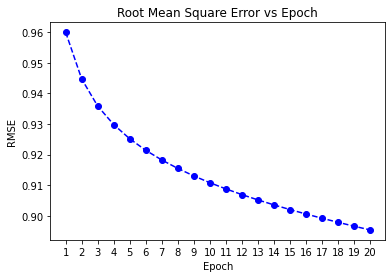

In [9]:
X = np.arange(1, 21)
y = matrix_factorized.train_rmse 
plt.plot(X.astype('str'), y, '--bo')

plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Root Mean Square Error vs Epoch")

plt.show()
#Here, we can see that the RMSE is steadily decreasing by epochs. I plotted the graph for the effect of new user's on the pretrained model.

Now, let us analyze the outcome of the model

In [31]:
#Analyzing users' biases toward ratings:
np.mean(matrix_factorized.user_biases) #mean bias of users = 0.0181
np.var(matrix_factorized.user_biases) #var bias of users = 0.103
np.max(matrix_factorized.user_biases) #max bias of a user = 0.93
np.min(matrix_factorized.user_biases) #max bias of a user = -1.36

-1.3623809904543696

In [34]:
#Analyzing movies' biases:
np.mean(matrix_factorized.item_biases) #mean bias of users = 0.001
np.var(matrix_factorized.item_biases) #mean bias of users = 0.009
np.max(matrix_factorized.item_biases) #max bias of a user = 0.85
np.min(matrix_factorized.item_biases) #max bias of a user = -0.67

-0.6785058589595153

In [10]:
matrix_factorized.global_mean #Mean ratings for all ratings (real and predictions total)

3.515251720880011

In [11]:
np.mean(movie_data['rating']) #Mean ratings for already rated ones

3.501556983616962

In [40]:
np.max(np.mean(matrix_factorized.user_features, axis = 0)) #max average for a specific feature in user K-vectors is 0.01
np.min(np.mean(matrix_factorized.user_features, axis = 0)) #min average for a specific feature in user K-vectors is -0.01
np.mean(np.mean(matrix_factorized.user_features, axis = 0)) #average of feature averages in user K-vectors is 0.001
np.var(np.mean(matrix_factorized.user_features, axis = 0)) #average of feature averages in user K-vectors is 0.00002

2.1701151521863745e-05

In [44]:
np.max(np.mean(matrix_factorized.item_features, axis = 0)) #max average for a specific feature in item K-vectors is 0.002
np.min(np.mean(matrix_factorized.item_features, axis = 0)) #min average for a specific feature in user K-vectors is -0.002

-0.002582999431010328

In [15]:
movie_data

,user_id,item_id,rating
1,1.0,1.0,4.0
2,1.0,3.0,4.0
3,1.0,6.0,4.0
4,1.0,47.0,5.0
5,1.0,50.0,5.0
...,...,...,...
100832,610.0,166534.0,4.0
100833,610.0,168248.0,5.0
100834,610.0,168250.0,5.0
100835,610.0,168252.0,5.0


In [20]:
len(matrix_factorized.user_id_map) 

610

In [56]:
first_user_index = matrix_factorized.user_id_map[1] #301

In [57]:
first_user_fav_movie_index = matrix_factorized.item_id_map[318] #686

In [58]:
first_user_K_vector = matrix_factorized.user_features[first_user_index]
first_user_fav_movie_K_vector = matrix_factorized.item_features[first_user_fav_movie_index]

In [59]:
np.dot(first_user_K_vector, first_user_fav_movie_K_vector)

0.0656938864809962

In [60]:
matrix_factorized.user_id_map[610]

16

In [61]:
matrix_factorized.item_id_map[1]

264

In [65]:
np.dot(matrix_factorized.user_features[16], matrix_factorized.item_features[264])

0.21196260475790268

In [63]:
np.linalg.norm([3,4,5])


7.0710678118654755

In [66]:
np.dot(matrix_factorized.user_features[16], matrix_factorized.item_features[264])/(np.linalg.norm(matrix_factorized.user_features[16])*np.linalg.norm(matrix_factorized.item_features[264])) #cos teta of top rated movie

0.21579413563979694

In [113]:
epoch = 20
factor_lens = [5, 10, 20, 50, 100, 200, 500]
exp_count = len(factor_lens)
rmse_train_result_vecs = [None]*exp_count
rmse_test_result_vals = [None]*exp_count

for i, factor_len in enumerate(factor_lens):
  print("factor length: " + str(factor_len))

  # Start the training with a portion of the users
  matrix_factorized = KernelMF(n_epochs=20, n_factors=factor_len, verbose=1, lr=0.001, reg=0.005)
  matrix_factorized.fit(X_train_first, y_train_first)

  # Now, we are updating the model with new users
  matrix_factorized.update_users(X_train_update, y_train_update, lr=0.001, n_epochs=epoch, verbose=1)
  pred = matrix_factorized.predict(X_test_update)
  rmse = mse(y_test_update, pred, squared=False)
  #print(f"\nTest RMSE: {rmse:.4f}")
  rmse_test_result_vals[i] = rmse
  rmse_train_result_vecs[i] = matrix_factorized.train_rmse

factor length: 5
Epoch  1 / 20  -  train_rmse: 0.976221122082884
Epoch  2 / 20  -  train_rmse: 0.9514059658208692
Epoch  3 / 20  -  train_rmse: 0.9362941622910848
Epoch  4 / 20  -  train_rmse: 0.9255835506825096
Epoch  5 / 20  -  train_rmse: 0.9173525895444786
Epoch  6 / 20  -  train_rmse: 0.9107028456973837
Epoch  7 / 20  -  train_rmse: 0.9051781007070315
Epoch  8 / 20  -  train_rmse: 0.9004492901185416
Epoch  9 / 20  -  train_rmse: 0.896324801010681
Epoch  10 / 20  -  train_rmse: 0.8926645731176809
Epoch  11 / 20  -  train_rmse: 0.889397024974287
Epoch  12 / 20  -  train_rmse: 0.8864029030649534
Epoch  13 / 20  -  train_rmse: 0.8836782591920987
Epoch  14 / 20  -  train_rmse: 0.8811599455100776
Epoch  15 / 20  -  train_rmse: 0.8788190237527582
Epoch  16 / 20  -  train_rmse: 0.8766436549578669
Epoch  17 / 20  -  train_rmse: 0.8746039680712654
Epoch  18 / 20  -  train_rmse: 0.8726781855568012
Epoch  19 / 20  -  train_rmse: 0.8708786587073779
Epoch  20 / 20  -  train_rmse: 0.869145766256

In [114]:
rmse_test_result_vals

[0.9138534114494498,
 0.9136608874498252,
 0.9148397213356377,
 0.9170967319041632,
 0.916659163778959,
 0.9229726649354555,
 0.9383431159501079]

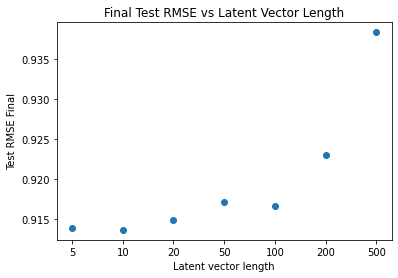

In [115]:
factor_lens_str = ['5', '10', '20', '50', '100', '200', '500']
plt.scatter(factor_lens_str, rmse_test_result_vals)

plt.xlabel("Latent vector length")
plt.ylabel("Test RMSE Final")
plt.title("Final Test RMSE vs Latent Vector Length")

plt.show()

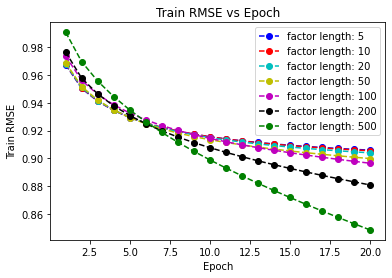

In [118]:
colors = ['b', 'r', 'c', 'y', 'm', 'k', 'g']
x = np.arange(1, 21)

for i in range(exp_count):
  plt.plot(x, rmse_train_result_vecs[i], '--bo', label = "factor length: " + str(factor_lens[i]),  color = colors[i])

plt.xlabel("Epoch")
plt.ylabel("Train RMSE")
plt.title("Train RMSE vs Epoch")
plt.legend()
plt.show()

In [ ]:
X = np.arange(1, 21)
y = matrix_factorized.train_rmse 
plt.plot(X.astype('str'), y, '--bo')

plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Root Mean Square Error vs Epoch")

plt.show()